In [1]:
import kaggle
! kaggle datasets download -d fahmidachowdhury/customer-segmentation-data-for-marketing-analysis

Dataset URL: https://www.kaggle.com/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis
License(s): CC0-1.0




  0%|          | 0.00/16.4k [00:00<?, ?B/s]
100%|██████████| 16.4k/16.4k [00:00<00:00, 303kB/s]


<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [2]:
import zipfile as zp 
ref = zp.ZipFile('customer-segmentation-data-for-marketing-analysis.zip')
ref.extractall()
ref.close()

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster  import KMeans
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Explore the data</p>

In [64]:
df = pd.read_csv('customer_segmentation_data.csv')
df

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [66]:
columns = df.columns

In [67]:
numeric_cols = [cols for cols in columns if df[cols].dtype in ['int64', 'float64']]
cat_cols = [cols for cols in columns if df[cols].dtype == 'object']

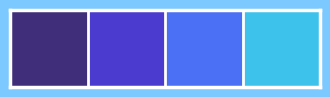

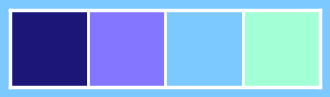

In [68]:
sns.set_style("dark")
sns.set(rc={"axes.facecolor":"#A3FFD6","figure.facecolor":"#7BC9FF"})
sns.set_context("poster",font_scale = .7)

palette = ['#402E7A','#4C3BCF','#4B70F5','#3DC2EC']
cluster_palette = ['#1C1678','#8576FF','#7BC9FF','#A3FFD6']
sns.palplot(sns.color_palette(palette))
sns.palplot(sns.color_palette(cluster_palette))


<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Exploratory data analysis</p>

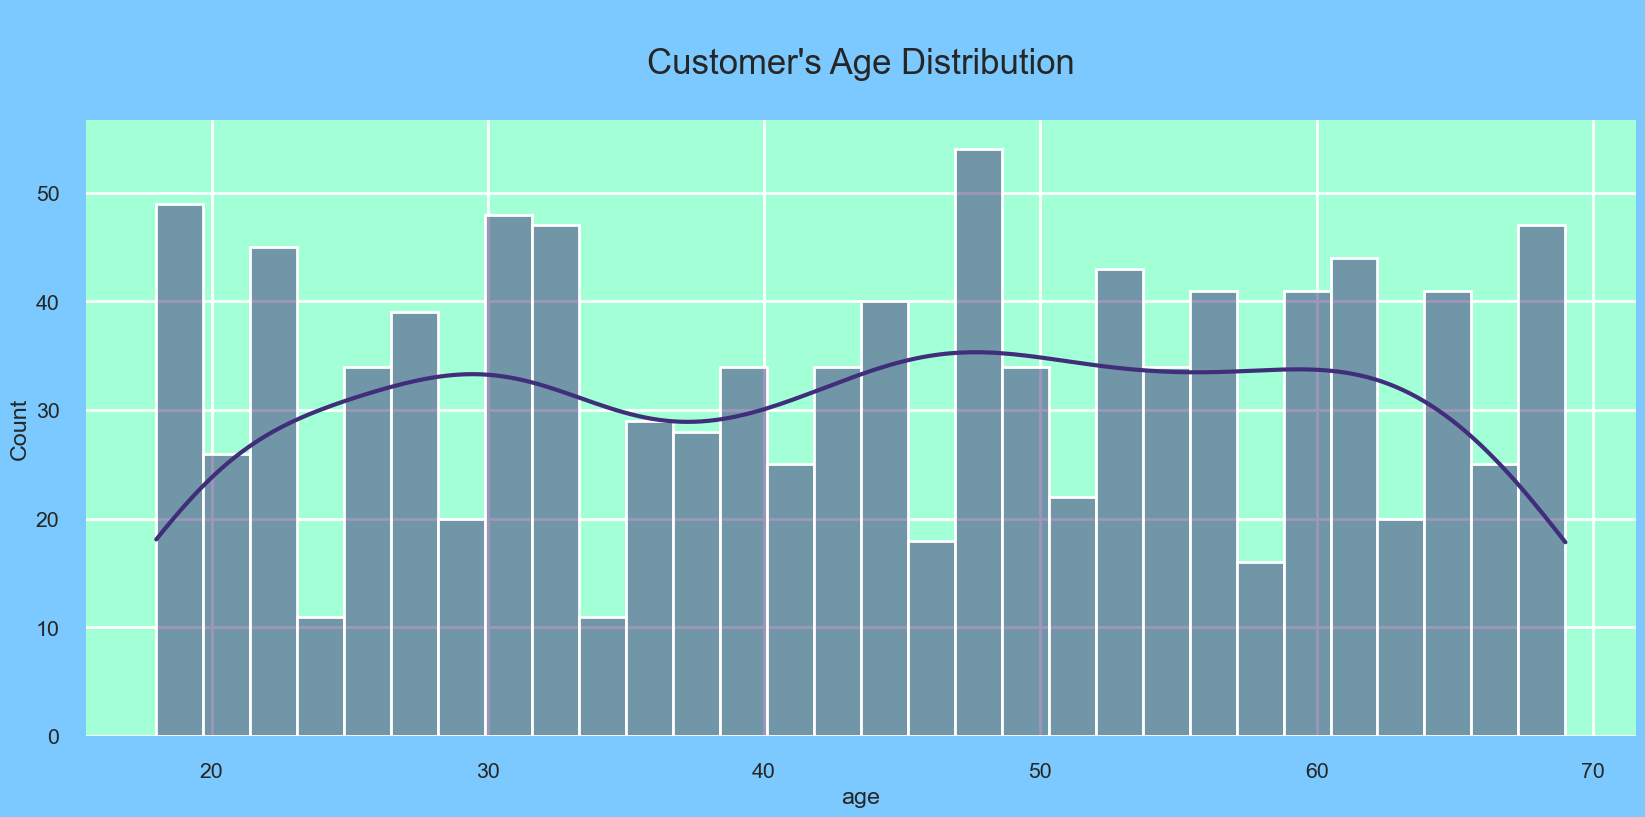

In [69]:
plt.figure(figsize=(20, 8))
p = sns.histplot(df['age'], color='#402E7A', kde=True, edgecolor='white', bins=30, alpha=0.5, fill=True)
p.axes.lines[0].set_color(palette[0])
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
sns.despine(left=True, bottom=True)
plt.show()

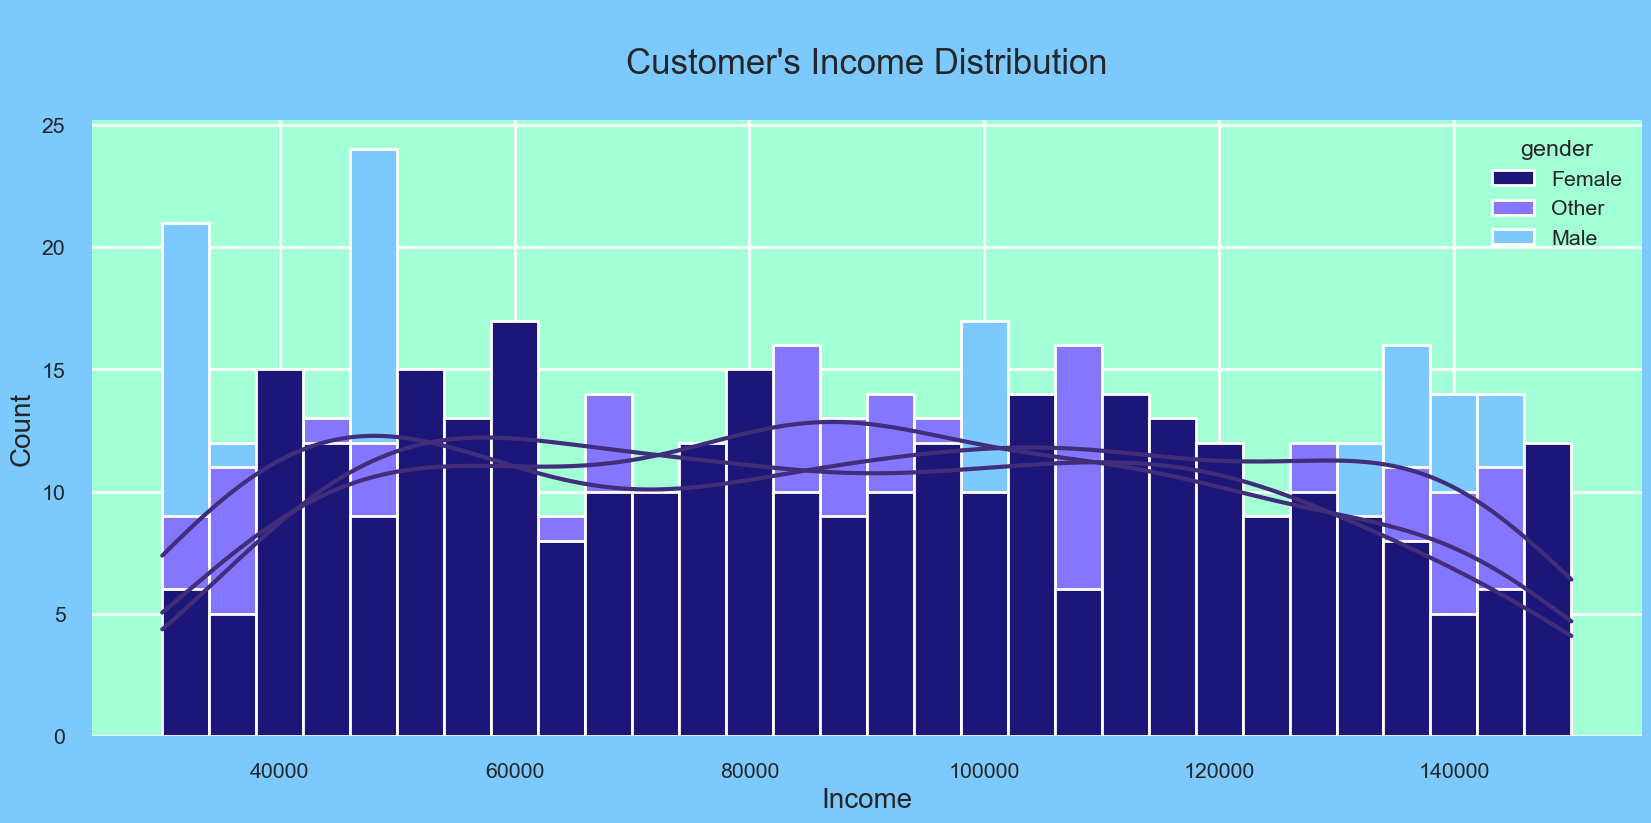

In [70]:
plt.figure(figsize=(20, 8))
p = sns.histplot(data=df, x='income', palette=['#1C1678','#8576FF','#7BC9FF'], kde=True, edgecolor='white', bins=30, alpha=1, fill=True, hue= 'gender')
p.axes.lines[0].set_color(palette[0])
p.axes.lines[1].set_color(palette[0])
p.axes.lines[2].set_color(palette[0])
p.axes.set_title("\nCustomer's Income Distribution\n",fontsize=25)
plt.xlabel('Income', fontsize=20)
plt.ylabel('Count', fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()

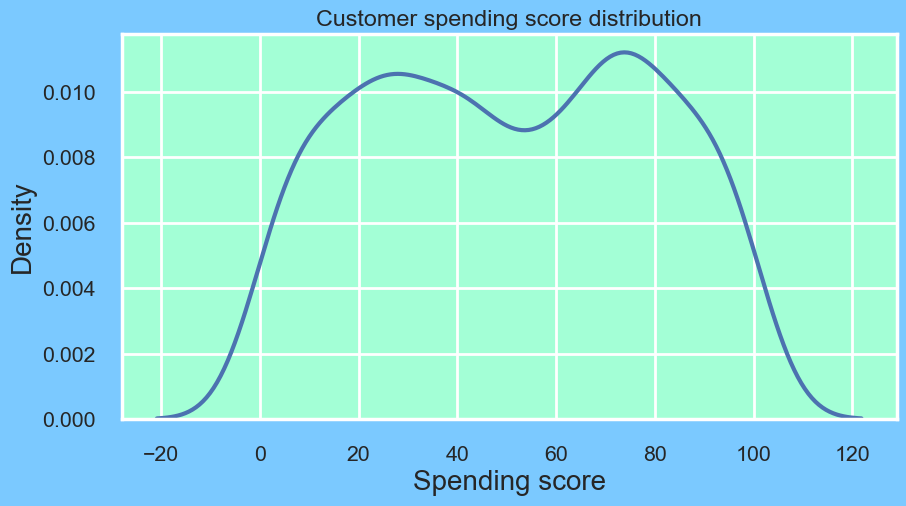

In [71]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['spending_score'])
plt.title('Customer spending score distribution')
plt.xlabel('Spending score',  fontsize = 20)
plt.ylabel('Density', fontsize= 20)
plt.show()

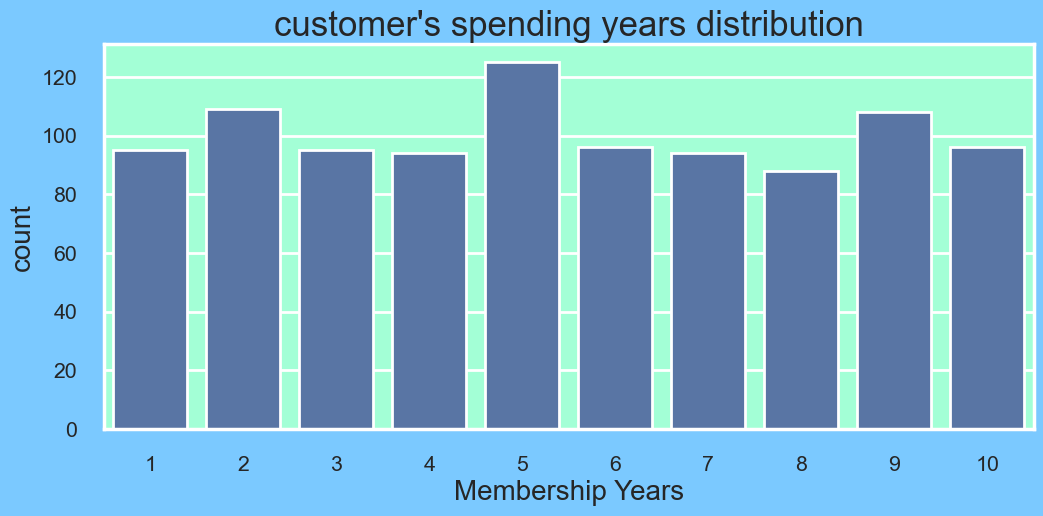

In [72]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='membership_years')
plt.title('customer\'s spending years distribution', fontsize= 25)
plt.xlabel("Membership Years", fontsize= 20)
plt.ylabel('count', fontsize= 20)
plt.show()


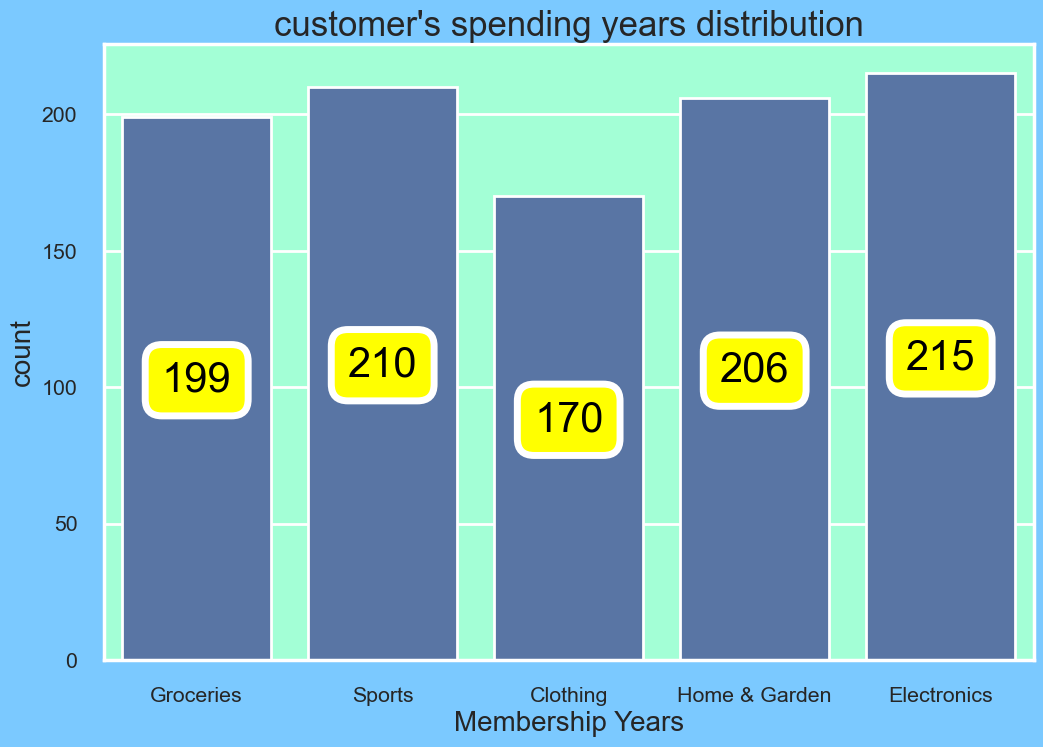

In [73]:
plt.figure(figsize=(12, 8))
p= sns.countplot(data=df, x='preferred_category')
plt.title('customer\'s spending years distribution', fontsize= 25)
plt.xlabel("Membership Years", fontsize= 20)
plt.ylabel('count', fontsize= 20)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "yellow", "edgecolor": "white", "linewidth" : 5, "alpha": 1})
plt.show()

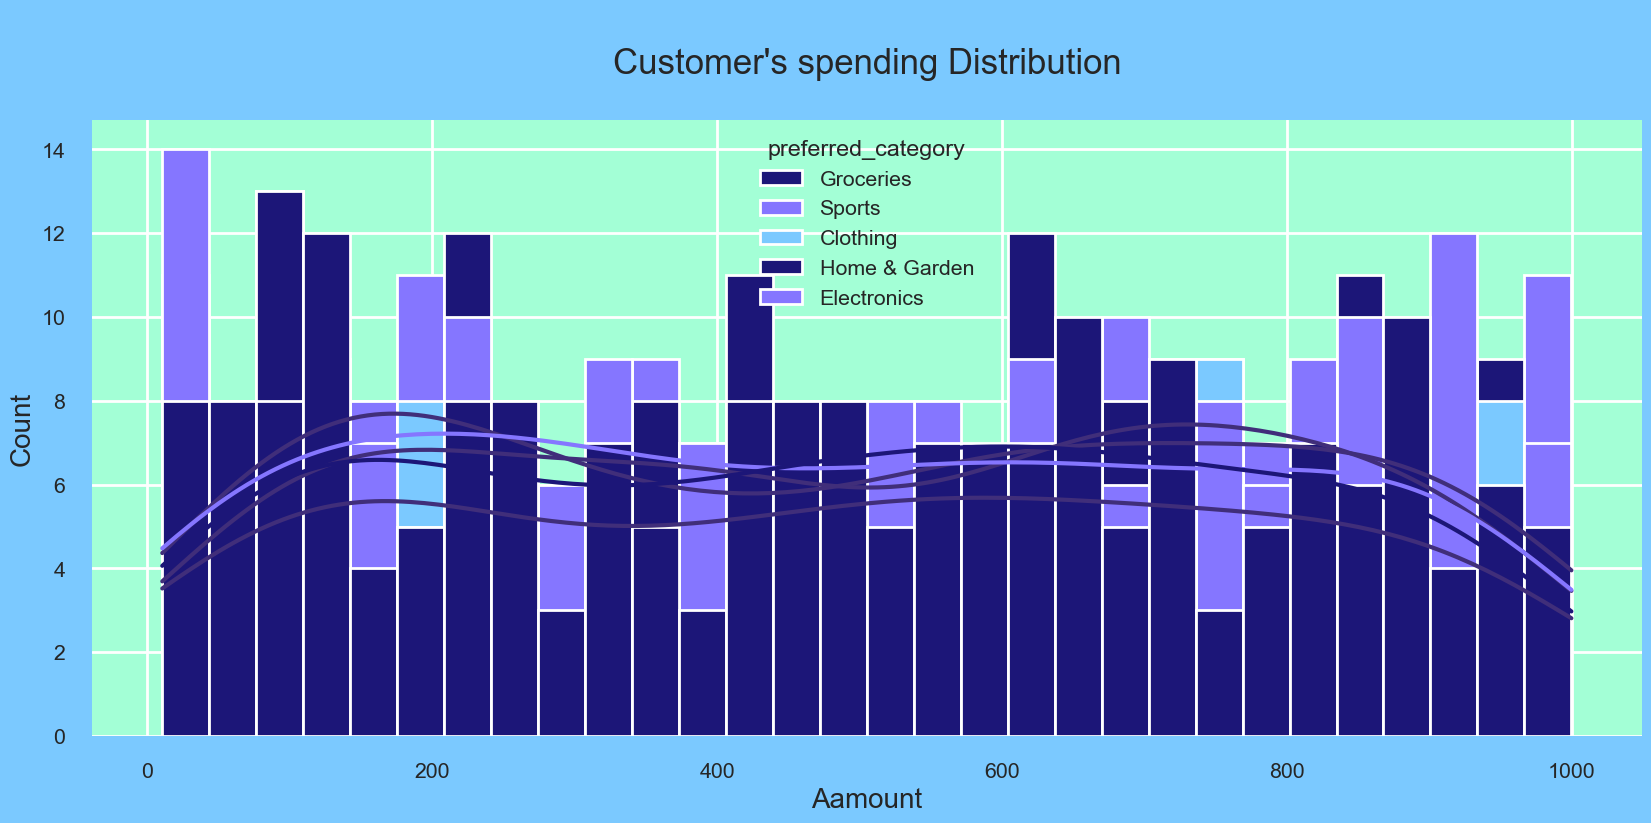

In [74]:
plt.figure(figsize=(20, 8))
p = sns.histplot(data=df, x='last_purchase_amount', palette=['#1C1678','#8576FF','#7BC9FF'], kde=True, edgecolor='white', bins=30, alpha=1, fill=True, hue= 'preferred_category')
p.axes.lines[0].set_color(palette[0])
p.axes.lines[1].set_color(palette[0])
p.axes.lines[2].set_color(palette[0])
p.axes.set_title("\nCustomer's spending Distribution\n",fontsize=25)
plt.xlabel('Aamount', fontsize=20)
plt.ylabel('Count', fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()

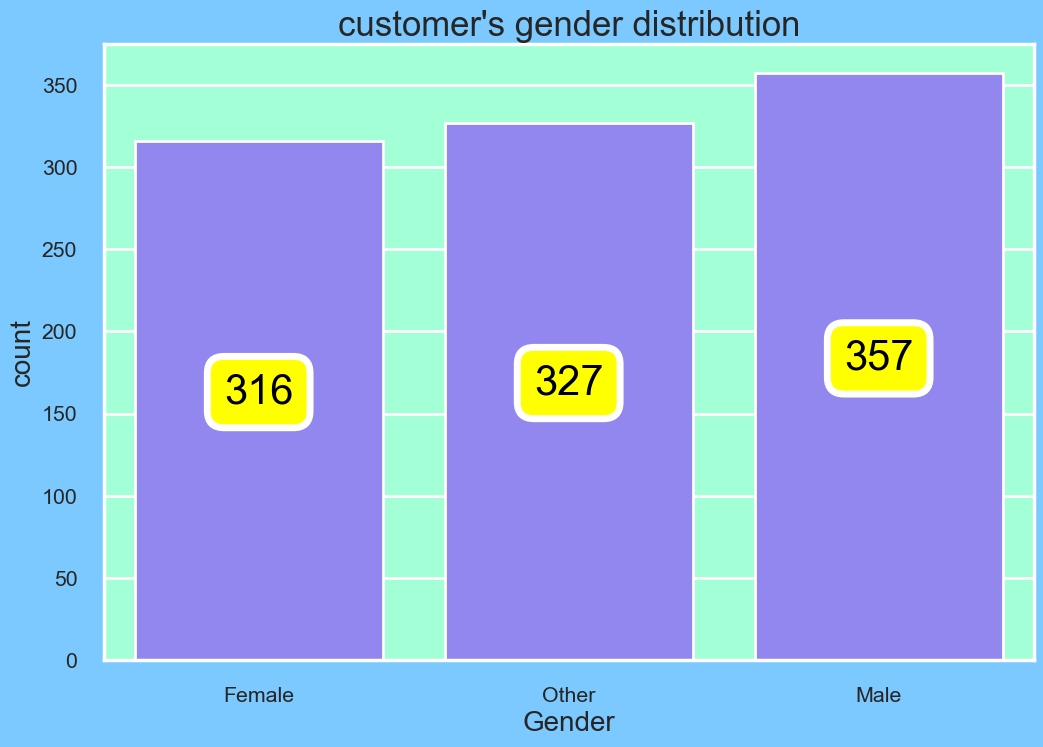

In [75]:
plt.figure(figsize=(12, 8))
p= sns.countplot(data=df, x='gender', color='#8576FF')
plt.title('customer\'s gender distribution', fontsize= 25)
plt.xlabel("Gender", fontsize= 20)
plt.ylabel('count', fontsize= 20)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "yellow", "edgecolor": "white", "linewidth" : 5, "alpha": 1})
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Feature Engineering</p>

In [77]:
le = LabelEncoder()
df_Kmeans = df.copy()
for cols in columns:
    if df[cols].dtype == 'object':
        df_Kmeans[cols] = le.fit_transform(df[cols])

In [79]:
ss = StandardScaler()
df_Kmeans = ss.fit_transform(df_Kmeans)

<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:70%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Elbow method to find the optimal K value</p>

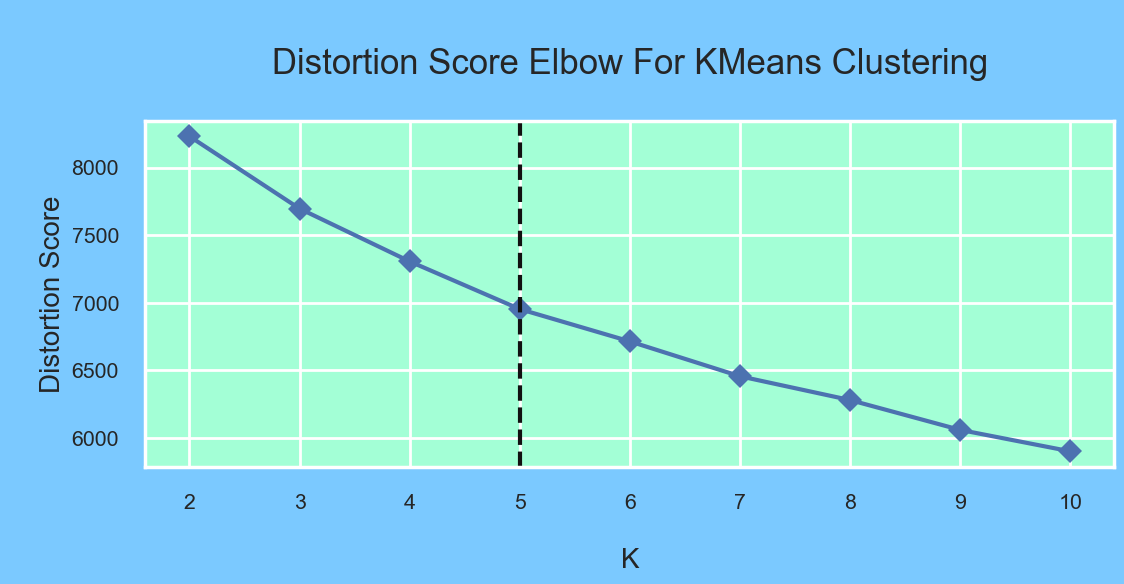

In [80]:
_, axes = plt.subplots(figsize=(12, 8))
elbow = KElbowVisualizer(KMeans(), k = 10, locate_elbow= True, timings= False, size= (1250, 450))
elbow.fit(df_Kmeans)
axes.set_title("\nDistortion Score Elbow For KMeans Clustering\n",fontsize=25)
axes.set_xlabel("\nK",fontsize=20)
axes.set_ylabel("\nDistortion Score",fontsize=20)
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Model Training</p>

In [82]:
km = KMeans(n_clusters=5, random_state=42)
pred = km.fit_predict(df_Kmeans)
df['clusters'] = pred

In [85]:
df

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,clusters
0,1,38,Female,99342,90,3,24,Groceries,113.53,3
1,2,21,Female,78852,60,2,42,Sports,41.93,1
2,3,60,Female,126573,30,2,28,Clothing,424.36,3
3,4,40,Other,47099,74,9,5,Home & Garden,991.93,2
4,5,65,Female,140621,21,3,25,Electronics,347.08,3
...,...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64,4
996,997,23,Other,65337,76,10,23,Groceries,632.83,2
997,998,23,Male,113097,40,5,42,Sports,75.09,1
998,999,22,Female,113695,63,7,44,Electronics,505.16,1


<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Segmentating Customer</p>

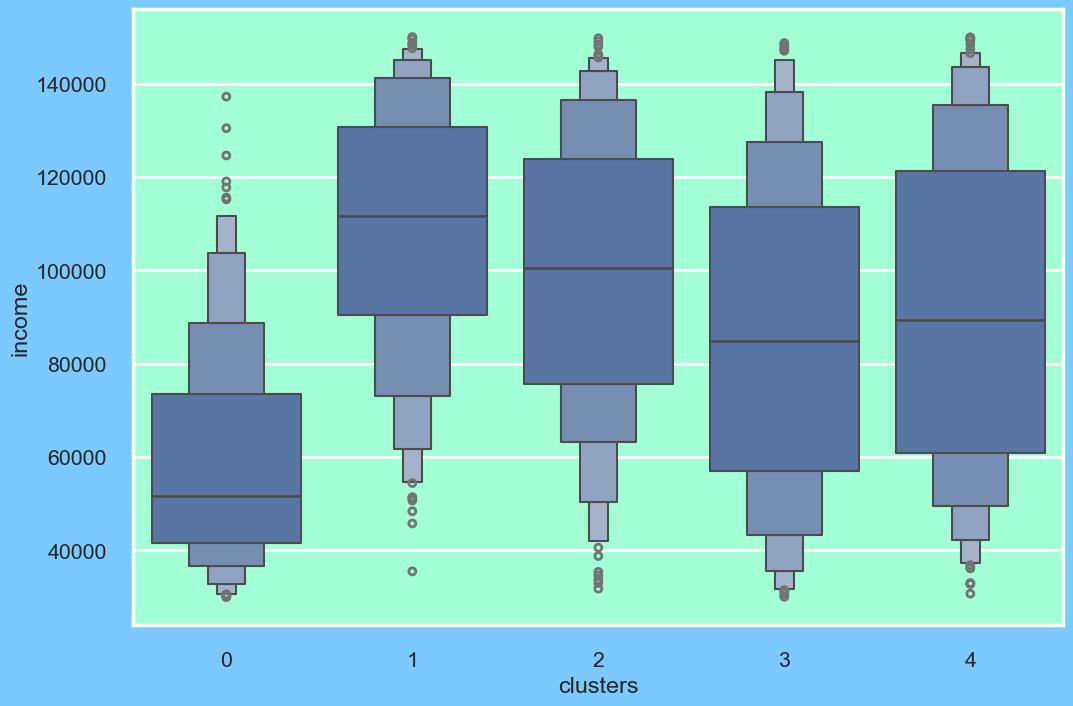

In [93]:
plt.figure(figsize=(12, 8))
sns.boxenplot(data=df, x='clusters', y = 'income')
plt.show()

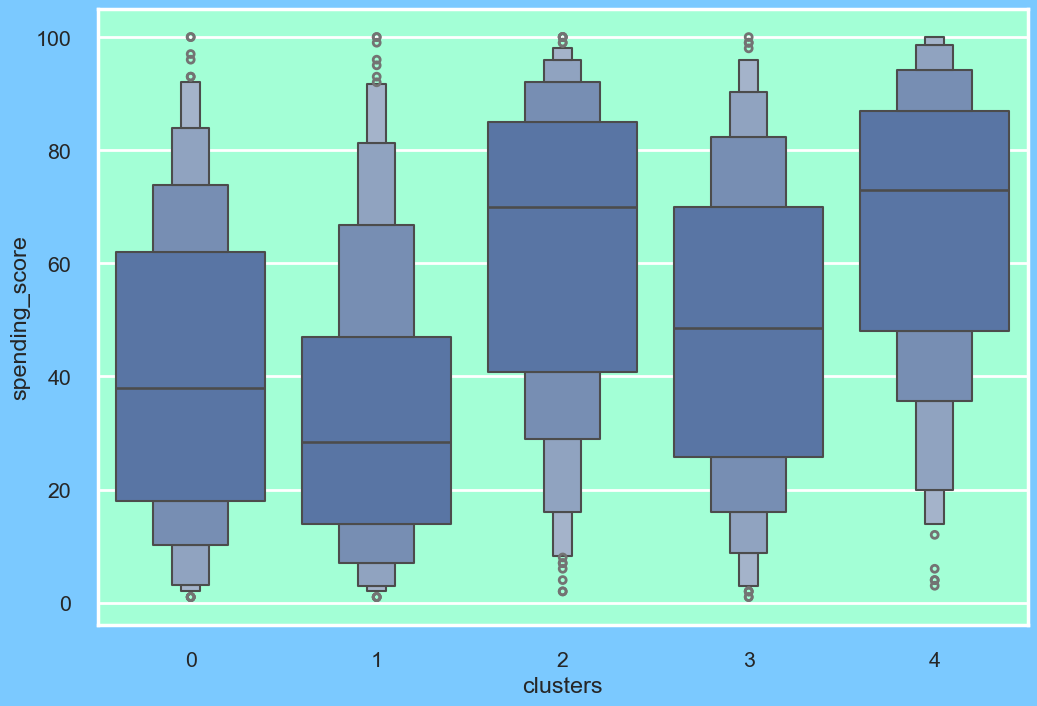

In [95]:
plt.figure(figsize=(12, 8))
sns.boxenplot(data=df, x='clusters', y = 'spending_score')
plt.show()

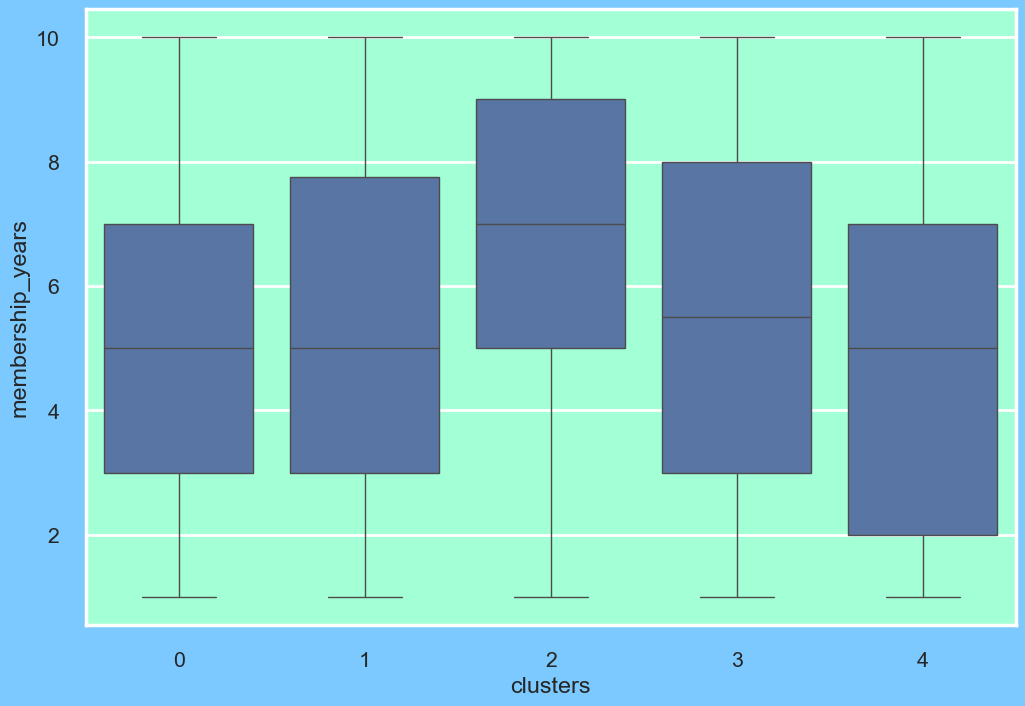

In [98]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='clusters', y = 'membership_years')
plt.show()

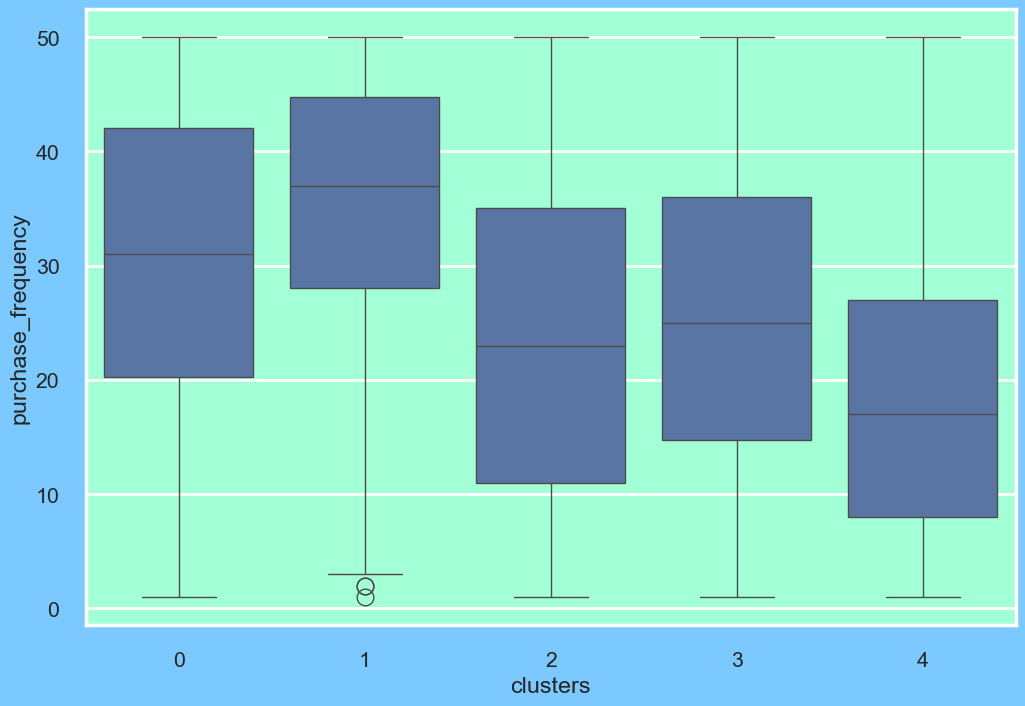

In [100]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='clusters', y = 'purchase_frequency')
plt.show()

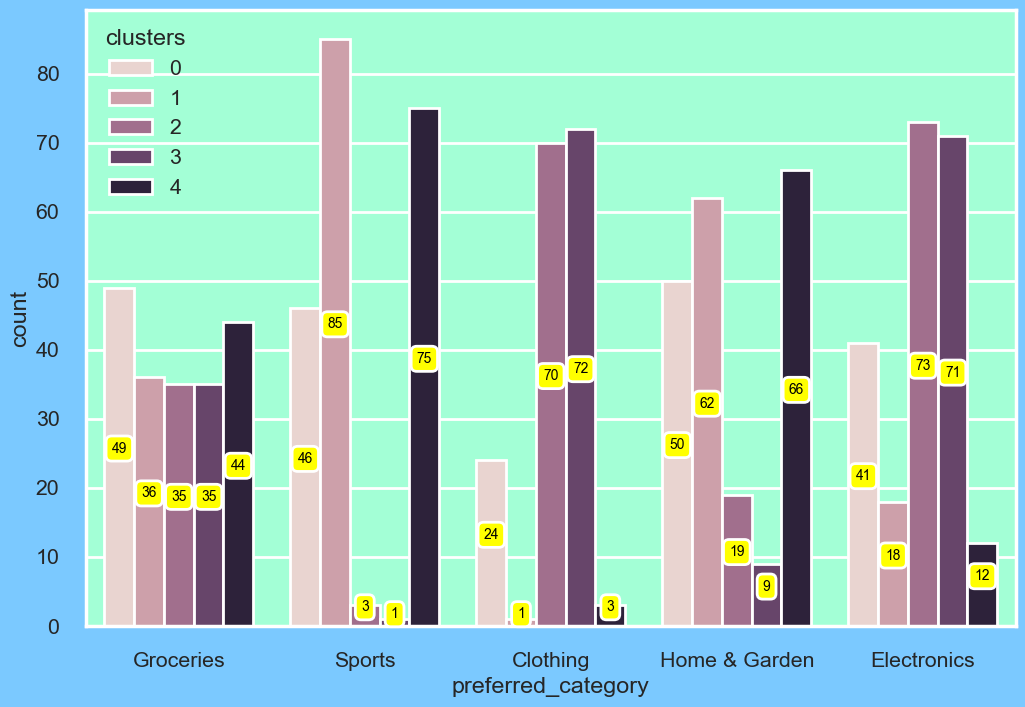

In [109]:
plt.figure(figsize=(12, 8))
p = sns.countplot(data=df, x='preferred_category', hue='clusters')
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=10,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "yellow", "edgecolor": "white", "linewidth" : 2, "alpha": 1})
plt.show()

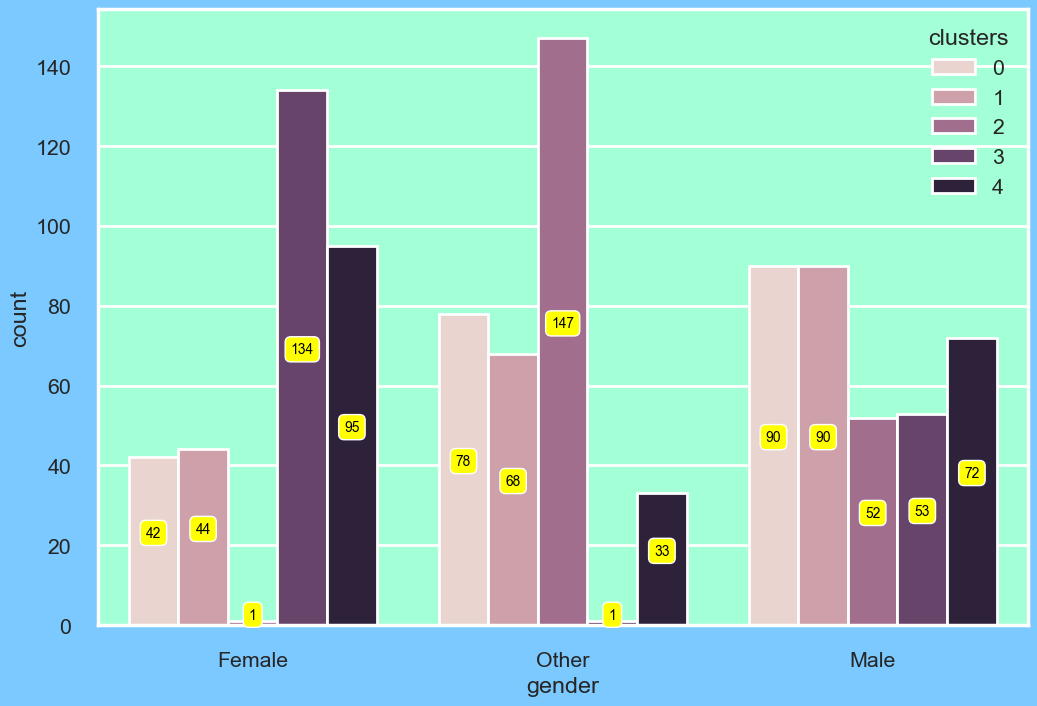

In [111]:
plt.figure(figsize=(12, 8))
p = sns.countplot(data=df, x='gender', hue='clusters')
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=10,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "yellow", "edgecolor": "white", "linewidth" : 1, "alpha": 1})
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Conclusion and Results</p>